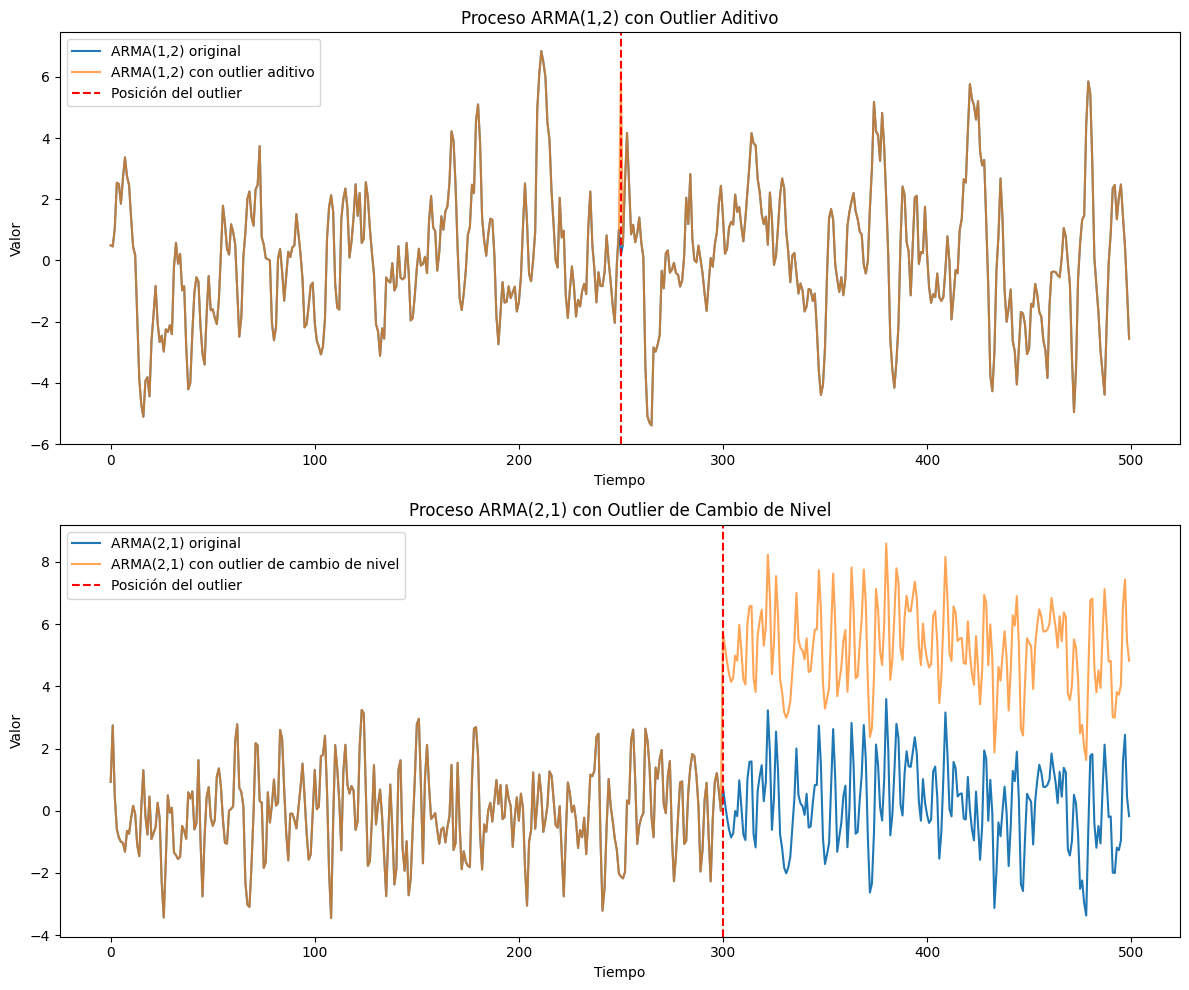

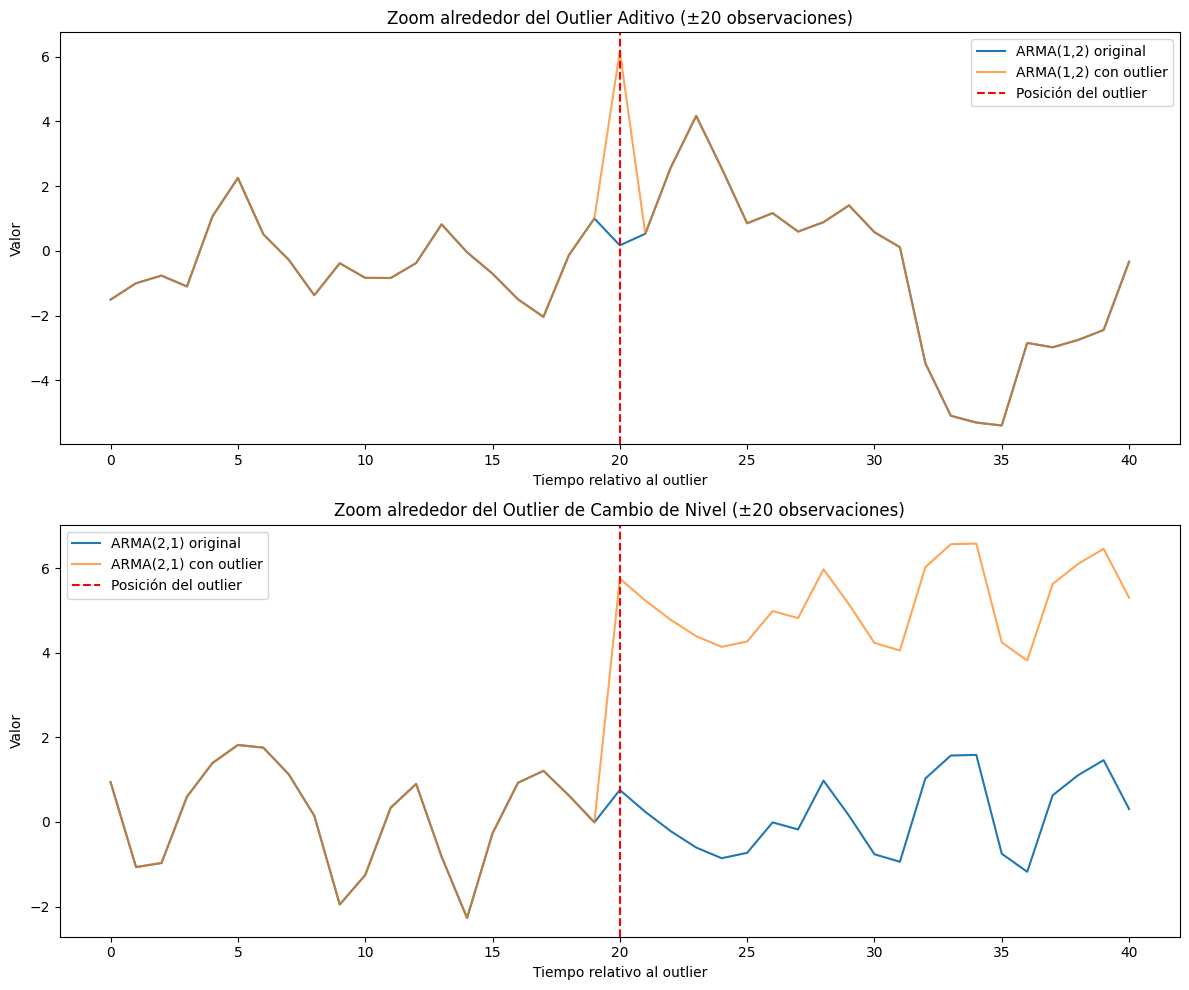

ARMA(1,2) con outlier aditivo:
Valor original en la posición del outlier: 0.1717
Valor con outlier en la posición 250: 6.1717
Diferencia (impacto del outlier): 6.0000

ARMA(2,1) con outlier de cambio de nivel:
Valor original en la posición del outlier: 0.7577
Valor con outlier en la posición 300: 5.7577
Diferencia (impacto del outlier): 5.0000
Media de la diferencia después del outlier: 5.0000


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_process import arma_generate_sample

# Parámetros comunes
np.random.seed(42)
n = 500  # Número de observaciones

# Función para agregar outlier de cambio de nivel
def add_level_shift(y, position, impact):
    y_with_outlier = y.copy()
    y_with_outlier[position:] += impact
    return y_with_outlier

# Parte 1: ARMA(1,2) con outlier aditivo
ar_params1 = [1, -0.7]  # Parámetros AR (1 - 0.7L)
ma_params1 = [1, 0.5, 0.3]  # Parámetros MA (1 + 0.5L + 0.3L^2)
outlier_position1 = 250  # Posición del outlier aditivo
outlier_impact1 = 6  # Impacto del outlier aditivo

# Generar proceso ARMA(1,2)
y1 = arma_generate_sample(ar_params1, ma_params1, n)

# Añadir outlier aditivo
y1_with_outlier = y1.copy()
y1_with_outlier[outlier_position1] += outlier_impact1

# Parte 2: ARMA(2,1) con outlier de cambio de nivel
ar_params2 = [1, -0.5, 0.3]  # Parámetros AR (1 - 0.5L + 0.3L^2)
ma_params2 = [1, 0.4]  # Parámetros MA (1 + 0.4L)
outlier_position2 = 300  # Posición del outlier de cambio de nivel
outlier_impact2 = 5  # Impacto del outlier de cambio de nivel

# Generar proceso ARMA(2,1)
y2 = arma_generate_sample(ar_params2, ma_params2, n)

# Añadir outlier de cambio de nivel
y2_with_outlier = add_level_shift(y2, outlier_position2, outlier_impact2)

# Visualización
plt.figure(figsize=(12, 10))

# ARMA(1,2) con outlier aditivo
plt.subplot(2, 1, 1)
plt.plot(y1, label='ARMA(1,2) original')
plt.plot(y1_with_outlier, label='ARMA(1,2) con outlier aditivo', alpha=0.7)
plt.axvline(x=outlier_position1, color='r', linestyle='--', label='Posición del outlier')
plt.legend()
plt.title('Proceso ARMA(1,2) con Outlier Aditivo')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

# ARMA(2,1) con outlier de cambio de nivel
plt.subplot(2, 1, 2)
plt.plot(y2, label='ARMA(2,1) original')
plt.plot(y2_with_outlier, label='ARMA(2,1) con outlier de cambio de nivel', alpha=0.7)
plt.axvline(x=outlier_position2, color='r', linestyle='--', label='Posición del outlier')
plt.legend()
plt.title('Proceso ARMA(2,1) con Outlier de Cambio de Nivel')
plt.xlabel('Tiempo')
plt.ylabel('Valor')

plt.tight_layout()
plt.show()

# Zoom alrededor de los outliers
window = 20
plt.figure(figsize=(12, 10))

# Zoom ARMA(1,2) con outlier aditivo
plt.subplot(2, 1, 1)
plt.plot(y1[outlier_position1-window:outlier_position1+window+1], label='ARMA(1,2) original')
plt.plot(y1_with_outlier[outlier_position1-window:outlier_position1+window+1], label='ARMA(1,2) con outlier', alpha=0.7)
plt.axvline(x=window, color='r', linestyle='--', label='Posición del outlier')
plt.legend()
plt.title(f'Zoom alrededor del Outlier Aditivo (±{window} observaciones)')
plt.xlabel('Tiempo relativo al outlier')
plt.ylabel('Valor')

# Zoom ARMA(2,1) con outlier de cambio de nivel
plt.subplot(2, 1, 2)
plt.plot(y2[outlier_position2-window:outlier_position2+window+1], label='ARMA(2,1) original')
plt.plot(y2_with_outlier[outlier_position2-window:outlier_position2+window+1], label='ARMA(2,1) con outlier', alpha=0.7)
plt.axvline(x=window, color='r', linestyle='--', label='Posición del outlier')
plt.legend()
plt.title(f'Zoom alrededor del Outlier de Cambio de Nivel (±{window} observaciones)')
plt.xlabel('Tiempo relativo al outlier')
plt.ylabel('Valor')

plt.tight_layout()
plt.show()

print("ARMA(1,2) con outlier aditivo:")
print(f"Valor original en la posición del outlier: {y1[outlier_position1]:.4f}")
print(f"Valor con outlier en la posición {outlier_position1}: {y1_with_outlier[outlier_position1]:.4f}")
print(f"Diferencia (impacto del outlier): {y1_with_outlier[outlier_position1] - y1[outlier_position1]:.4f}")

print("\nARMA(2,1) con outlier de cambio de nivel:")
print(f"Valor original en la posición del outlier: {y2[outlier_position2]:.4f}")
print(f"Valor con outlier en la posición {outlier_position2}: {y2_with_outlier[outlier_position2]:.4f}")
print(f"Diferencia (impacto del outlier): {y2_with_outlier[outlier_position2] - y2[outlier_position2]:.4f}")
print(f"Media de la diferencia después del outlier: {np.mean(y2_with_outlier[outlier_position2:] - y2[outlier_position2:]):.4f}")